In [41]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
from PIL import Image

def resize_image(image_path, output_size, image_name):
    image = Image.open(image_path)
    width, height = image.size
    max_dim = max(width, height)
    scale = output_size / max_dim
    new_width = int(width * scale)
    new_height = int(height * scale)
    resized_image = image.resize((new_width, new_height))
    output_image = Image.new('RGB', (output_size, output_size), 'black')
    x = (output_size - new_width) // 2
    y = (output_size - new_height) // 2

    output_image.paste(resized_image, (x, y))
    output_image.save(image_name)


In [43]:
data = pd.read_csv('./dataset.csv', names=['path', 'class'])
data

,path,class
0,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
1,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
2,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
3,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
4,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
...,...,...
28209,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28210,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28211,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28212,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small


In [44]:
import cv2 as cv
import numpy as np

def jaccard_similarity(image1, image2):
    # Convert images to binary masks
    image1 = np.where(image1 > 0, 1, 0).astype(np.uint8)
    image2 = np.where(image2 > 0, 1, 0).astype(np.uint8)

    # Compute the intersection and union of the masks
    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()

    # Calculate the Jaccard Similarity
    jaccard_similarity = intersection / union
    return jaccard_similarity

In [68]:
import os


In [69]:
index_for_classes = pd.read_csv('index_for_classes.csv')

In [70]:
index_for_classes

,class,id
0,Land,0
1,Buildings,2340
2,Tools,2662
3,Store event,4107
4,Snails and shells,4319
5,Clo-occ,4413
6,Bath Baby,5749
7,Auto,6099
8,Flowers,7653
9,Prints,7723


In [88]:
while(1):
    path = input("Enter Valid Image path: ")
    if(os.path.exists(path) == False) :
        continue
    break
resize_image(path, 256, path)
image = cv.imread(path)

In [89]:
classes = ['Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects']
while(1):
    
    ui_class = input('enter class name : ')
    if ui_class not in classes:
        print("enter one of these 'Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects'")
        continue
    break
start = 0
end = 0
for i in range(len(index_for_classes['class'])):
    if(ui_class == index_for_classes['class'][i]):
        start = index_for_classes['id'][i]
        end = index_for_classes['id'][i+1]

print(start, end)

9204 9669


In [90]:
ui_edge = image
ui_edge= cv.cvtColor(ui_edge, cv.COLOR_BGR2GRAY)
ui_edge = cv.convertScaleAbs(ui_edge, alpha=1.5, beta=10)
jaccardArr = []
# before_gray = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)
for i in range(start,end):
    ximg = cv.imread(data['path'][i])
    ximg = cv.cvtColor(ximg, cv.COLOR_BGR2GRAY)
    score = jaccard_similarity(ui_edge, ximg)
    jaccardArr.append([score,data['path'][i]])

len(jaccardArr)

465

[1.0, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n09288635_12213.JPEG']
[1.0, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n09428293_44485.JPEG']
[1.0, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/ILSVRC2012_val_00048786.JPEG']
[0.9999847412109375, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/ILSVRC2012_val_00039019.JPEG']
[0.9999542236328125, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n09332890_3614.JPEG']
[0.99786376953125, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n09332890_19390.JPEG']
[0.99786376953125, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n03218198_22.JPEG']
[0.982818603515625, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n07802026_14385.JPEG']
[0.946685791015625, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n09288635_517.JPEG']
[0.9130401611328125, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n02894605_57256.JPEG']
[0.876739501953125, '/Users/avdhantyagi/DISK/notebook/Dataset/Nature/n07802026_1982.JPEG']


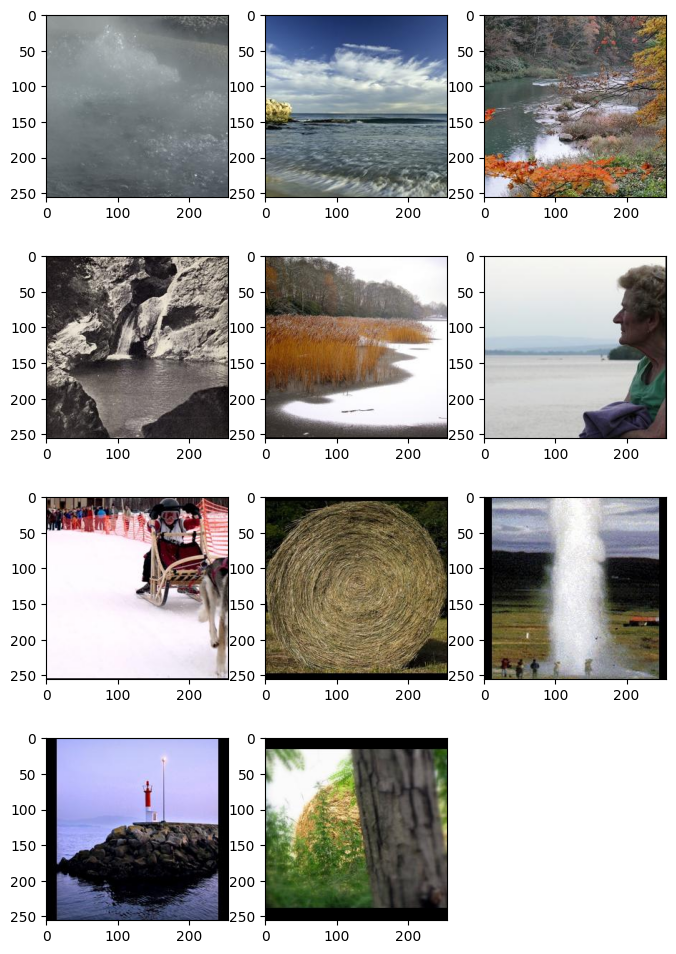

In [91]:
import operator
jaccardArr = sorted(jaccardArr, key=operator.itemgetter(0))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,12))
rows = 4
columns = 3
for i in range(1,rows*columns):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(cv.imread(jaccardArr[-i][1]), cv.COLOR_BGR2RGB))
    print(jaccardArr[-i])
plt.show()

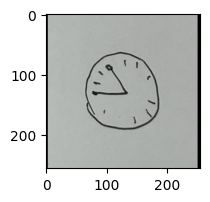

In [92]:
fig = plt.figure(figsize=(2,2))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))